In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../credit_loan/Loan_approval_data_2025.csv')
df.head()

customer_id  age occupation_status  years_employed  annual_income  \
0  CUST100000   40          Employed            17.2          25579   
1  CUST100001   33          Employed             7.3          43087   
2  CUST100002   42           Student             1.1          20840   
3  CUST100003   53           Student             0.5          29147   
4  CUST100004   32          Employed            12.5          63657   

   credit_score  credit_history_years  savings_assets  current_debt  \
0           692                   5.3             895         10820   
1           627                   3.5             169         16550   
2           689                   8.4              17          7852   
3           692                   9.8            1480         11603   
4           630                   7.2             209         12424   

   defaults_on_file  delinquencies_last_2yrs  derogatory_marks   product_type  \
0                 0                        0                 0    Credit Card   
1                 0                        1                 0  Personal Loan   
2                 0                        0                 0    Credit Card   
3                 0                        1                 0    Credit Card   
4                 0                        0                 0  Personal Loan   

          loan_intent  loan_amount  interest_rate  debt_to_income_ratio  \
0            Business          600          17.02                 0.423   
1    Home Improvement        53300          14.10                 0.384   
2  Debt Consolidation         2100          18.33                 0.377   
3            Business         2900          18.74                 0.398   
4           Education        99600          13.92                 0.195   

   loan_to_income_ratio  payment_to_income_ratio  loan_status  
0                 0.023                    0.008            1  
1                 1.237                    0.412            0  
2                 0.101                    0.034            1  
3                 0.099                    0.033            1  
4                 1.565                    0.522            1

1.Ajustar tipos
2.Tratar missing
3.Remover duplicatas
4.Univariada
5.Bivariada
6.Outliers
7.Distribuições
8.Temporal
9.Geográfica
10.Categorias raras
11.Feature engineering
12.Documentação

In [3]:
df.columns.to_list()

['customer_id',
 'age',
 'occupation_status',
 'years_employed',
 'annual_income',
 'credit_score',
 'credit_history_years',
 'savings_assets',
 'current_debt',
 'defaults_on_file',
 'delinquencies_last_2yrs',
 'derogatory_marks',
 'product_type',
 'loan_intent',
 'loan_amount',
 'interest_rate',
 'debt_to_income_ratio',
 'loan_to_income_ratio',
 'payment_to_income_ratio',
 'loan_status']

In [4]:
df.shape

(50000, 20)

In [5]:
ids = [
"661d58ba8ef9ea7d96c04392","662aa3babc9bbb0441c136f0","662af4f0bc9bbb0441c1479c","6661e86b2cd792cdd197b381","666b1b882cd792cdd199489f","667c3ce82cd792cdd19c30f4","667dfddf2cd792cdd19c94e9","667df30d2cd792cdd19c8b03","667e02522cd792cdd19c99e8","669011609b00b81bb807b115","669ead9f9b00b81bb80a7553","66a2c24f9b00b81bb80b3f20","66a2e6419b00b81bb80b465d","66abd6999b00b81bb80d0882","66df45429b00b81bb8173219","66e856ff9b00b81bb8193ac2","66eb63249b00b81bb81a05a4","66eb6ef79b00b81bb81a097e","66eb73539b00b81bb81a0f6c","66f7f57488c46cc62d449c1e","67336962f8eb26f3732cc2a5","67485b4cf8eb26f373305d4b","66994d979b00b81bb8097755","6824a38c4bcc1cdcaacf79e0"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [7]:
df.isnull().sum()

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

In [8]:
df.isna().mean().sort_values(ascending=False)

customer_id                0.0
age                        0.0
occupation_status          0.0
years_employed             0.0
annual_income              0.0
credit_score               0.0
credit_history_years       0.0
savings_assets             0.0
current_debt               0.0
defaults_on_file           0.0
delinquencies_last_2yrs    0.0
derogatory_marks           0.0
product_type               0.0
loan_intent                0.0
loan_amount                0.0
interest_rate              0.0
debt_to_income_ratio       0.0
loan_to_income_ratio       0.0
payment_to_income_ratio    0.0
loan_status                0.0
dtype: float64

## limpeza

In [9]:
df_dropped = df.dropna(axis=1, how='all')
df_dropped.isnull().sum()

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

In [10]:
df_dropped = df_dropped.drop_duplicates()

## analise de variavel

In [11]:
df_dropped['loan_status'].value_counts(normalize=True)

loan_status
1    0.55046
0    0.44954
Name: proportion, dtype: float64

In [12]:
df_dropped.describe(include='all')

customer_id           age occupation_status  years_employed  \
count        50000  50000.000000             50000    50000.000000   
unique       50000           NaN                 3             NaN   
top     CUST149983           NaN          Employed             NaN   
freq             1           NaN             34971             NaN   
mean           NaN     34.957060               NaN        7.454868   
std            NaN     11.118603               NaN        7.612097   
min            NaN     18.000000               NaN        0.000000   
25%            NaN     26.000000               NaN        1.300000   
50%            NaN     35.000000               NaN        4.900000   
75%            NaN     43.000000               NaN       11.400000   
max            NaN     70.000000               NaN       39.900000   

        annual_income  credit_score  credit_history_years  savings_assets  \
count    50000.000000  50000.000000          50000.000000    50000.000000   
unique            NaN           NaN                   NaN             NaN   
top               NaN           NaN                   NaN             NaN   
freq              NaN           NaN                   NaN             NaN   
mean     50062.892040    643.614820              8.168274     3595.619400   
std      32630.501014     64.731518              7.207552    13232.399398   
min      15000.000000    348.000000              0.000000        0.000000   
25%      27280.500000    600.000000              2.000000      130.000000   
50%      41607.500000    643.000000              6.100000      568.000000   
75%      62723.250000    687.000000             12.600000     2271.000000   
max     250000.000000    850.000000             30.000000   300000.000000   

         current_debt  defaults_on_file  delinquencies_last_2yrs  \
count    50000.000000      50000.000000              50000.00000   
unique            NaN               NaN                      NaN   
top               NaN               NaN                      NaN   
freq              NaN               NaN                      NaN   
mean     14290.442220          0.053480                  0.55464   
std      13243.757493          0.224991                  0.84505   
min         60.000000          0.000000                  0.00000   
25%       5581.000000          0.000000                  0.00000   
50%      10385.000000          0.000000                  0.00000   
75%      18449.250000          0.000000                  1.00000   
max     163344.000000          1.000000                  9.00000   

        derogatory_marks product_type loan_intent    loan_amount  \
count       50000.000000        50000       50000   50000.000000   
unique               NaN            3           6            NaN   
top                  NaN  Credit Card    Personal            NaN   
freq                 NaN        22455       12429            NaN   
mean            0.147640          NaN         NaN   33041.874000   
std             0.412996          NaN         NaN   26116.185102   
min             0.000000          NaN         NaN     500.000000   
25%             0.000000          NaN         NaN   12300.000000   
50%             0.000000          NaN         NaN   26100.000000   
75%             0.000000          NaN         NaN   48500.000000   
max             4.000000          NaN         NaN  100000.000000   

        interest_rate  debt_to_income_ratio  loan_to_income_ratio  \
count    50000.000000          50000.000000          50000.000000   
unique            NaN                   NaN                   NaN   
top               NaN                   NaN                   NaN   
freq              NaN                   NaN                   NaN   
mean        15.498591              0.285724              0.701999   
std          4.067942              0.159787              0.465788   
min          6.000000              0.002000              0.008000   
25%         12.180000              0.161000            

In [13]:
print(df_dropped['loan_status'].value_counts())

loan_status
1    27523
0    22477
Name: count, dtype: int64


In [14]:
data = df_dropped.copy()

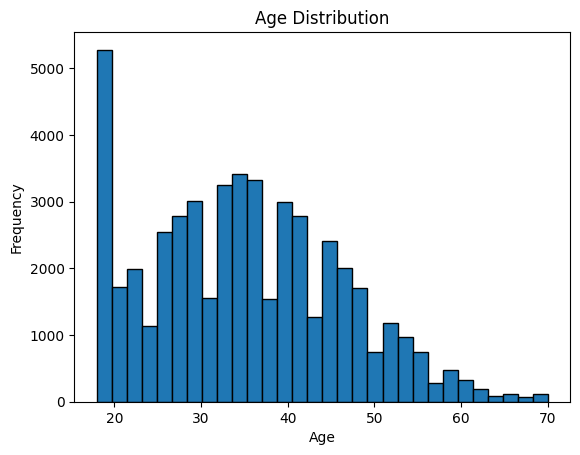

In [15]:
plt.hist(data['age'], bins=30, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [16]:
abaixo = data[data['age']< 20]['age']
abaixo.value_counts(normalize=True)


age
18    0.864506
19    0.135494
Name: proportion, dtype: float64

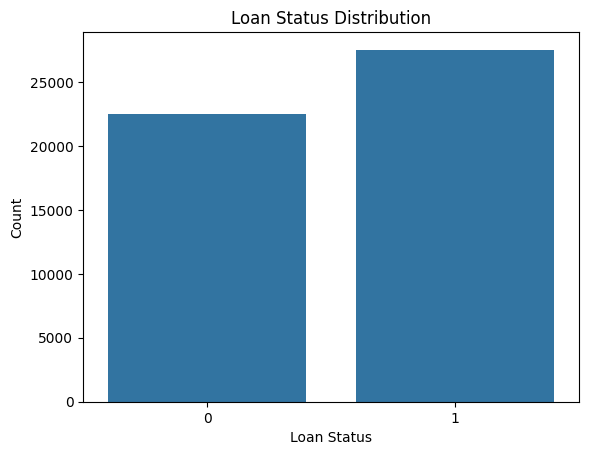

In [17]:
sns.countplot(x='loan_status', data=data)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.show()

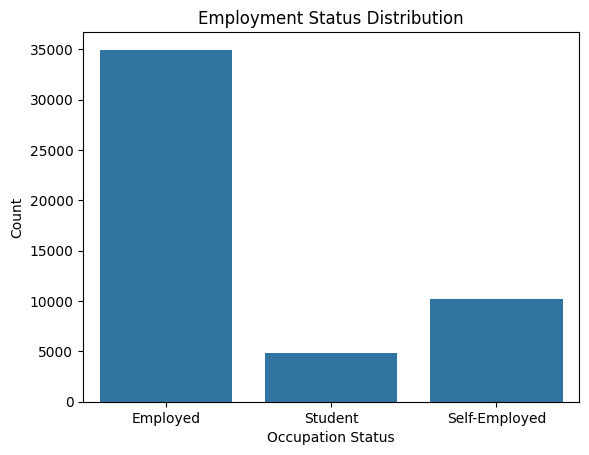

In [18]:
sns.countplot(x='occupation_status', data=data)
plt.xlabel('Occupation Status')
plt.ylabel('Count')
plt.title('Employment Status Distribution')
plt.show()

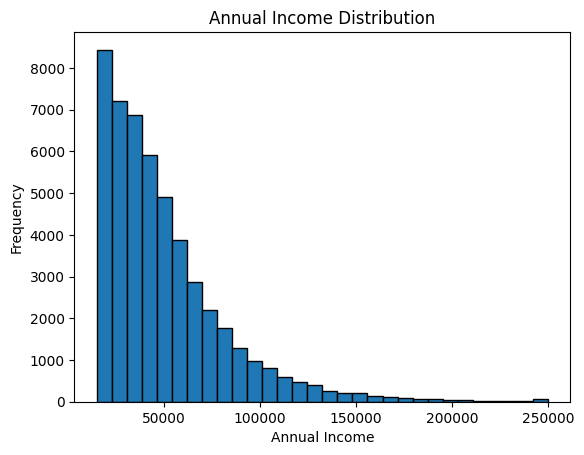

In [19]:
plt.hist(data['annual_income'], bins=30, edgecolor='k')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution')
plt.show()

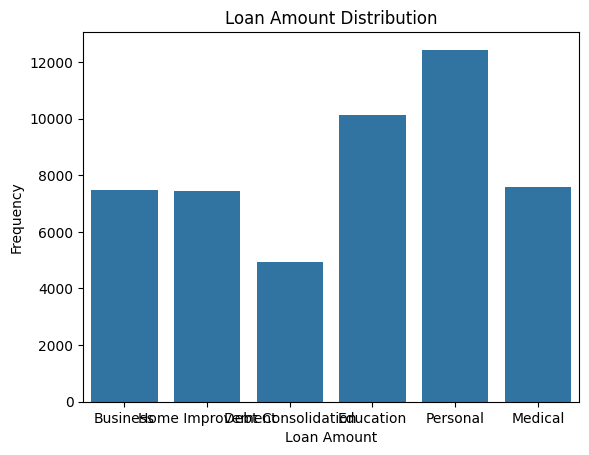

In [20]:
sns.countplot(x='loan_intent', data=df_dropped)
plt.title('Loan Amount Distribution')   
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [21]:
data['age'].mean()

np.float64(34.95706)

In [22]:
data['annual_income'].mean()

np.float64(50062.89204)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

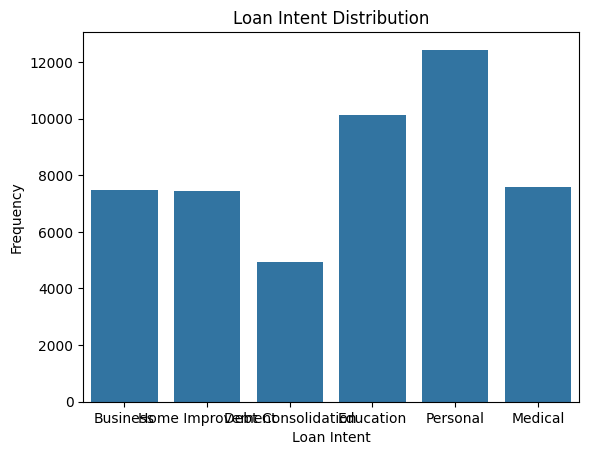

In [24]:
sns.countplot(x='loan_intent', data=data)
plt.xlabel('Loan Intent')
plt.ylabel('Frequency')
plt.title('Loan Intent Distribution')
plt.show()

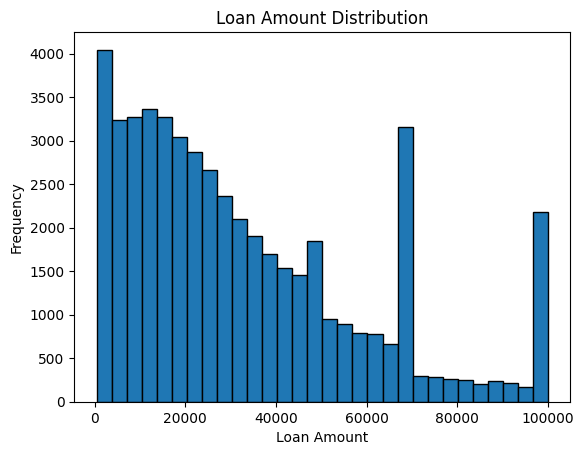

In [25]:
plt.hist(data['loan_amount'], bins=30, edgecolor='k')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')
plt.show()

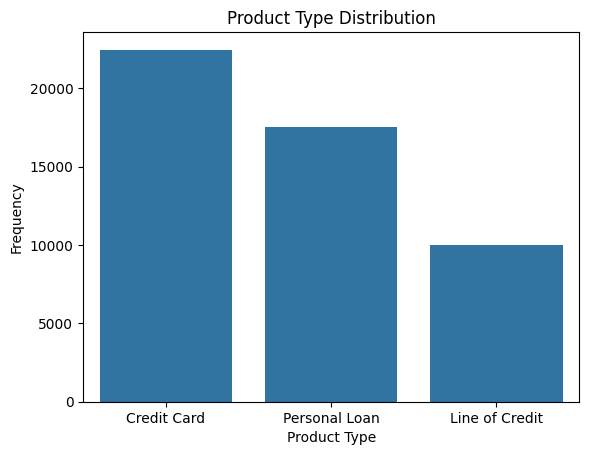

In [26]:
sns.countplot(x='product_type', data=data)
plt.xlabel('Product Type')
plt.ylabel('Frequency')
plt.title('Product Type Distribution')
plt.show()

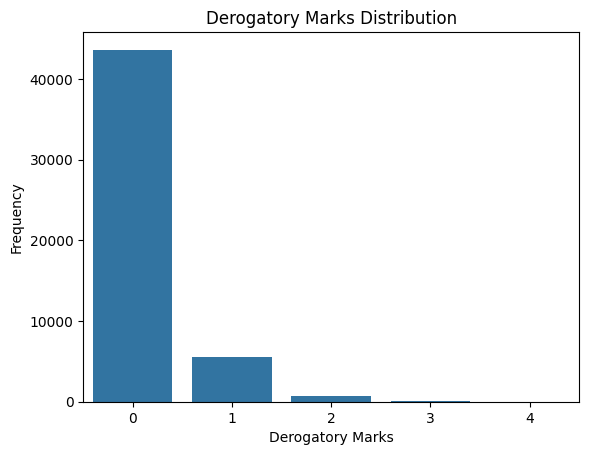

In [27]:
sns.countplot(x='derogatory_marks', data=data)
plt.xlabel('Derogatory Marks')
plt.ylabel('Frequency')
plt.title('Derogatory Marks Distribution')
plt.show()

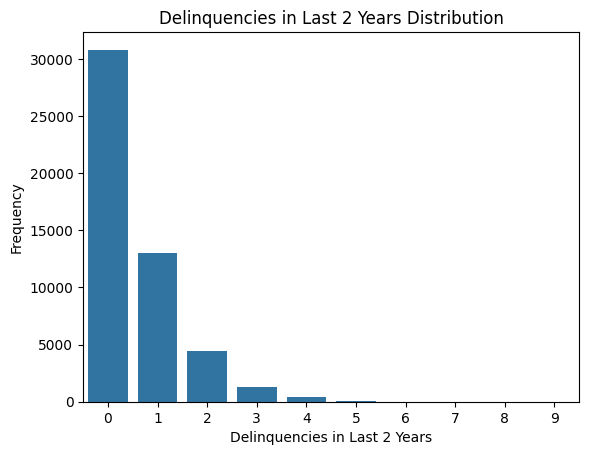

In [28]:
sns.countplot(x='delinquencies_last_2yrs', data=data)
plt.xlabel('Delinquencies in Last 2 Years')
plt.ylabel('Frequency')
plt.title('Delinquencies in Last 2 Years Distribution')
plt.show()

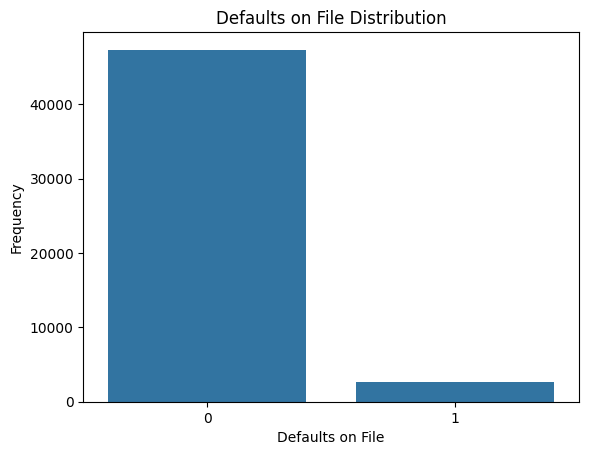

In [29]:
sns.countplot(x='defaults_on_file', data=data)
plt.xlabel('Defaults on File')
plt.ylabel('Frequency')
plt.title('Defaults on File Distribution')
plt.show()

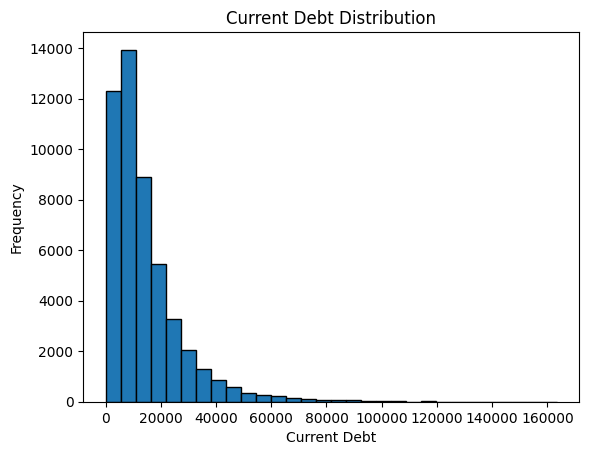

In [30]:
plt.hist(data['current_debt'], bins=30, edgecolor='k')
plt.xlabel('Current Debt')
plt.ylabel('Frequency')
plt.title('Current Debt Distribution')
plt.show()

In [31]:
data['age'].value_counts(normalize=True).sort_index()

age
18    0.09124
19    0.01430
20    0.01682
21    0.01750
22    0.01854
23    0.02138
24    0.02276
25    0.02558
26    0.02540
27    0.02740
28    0.02828
29    0.02866
30    0.03142
31    0.03122
32    0.03256
33    0.03240
34    0.03390
35    0.03426
36    0.03324
37    0.03336
38    0.03068
39    0.03044
40    0.02944
41    0.02944
42    0.02624
43    0.02546
44    0.02536
45    0.02272
46    0.02118
47    0.01888
48    0.01792
49    0.01626
50    0.01480
51    0.01230
52    0.01136
53    0.01076
54    0.00856
55    0.00804
56    0.00688
57    0.00562
58    0.00510
59    0.00430
60    0.00344
61    0.00300
62    0.00198
63    0.00188
64    0.00170
65    0.00124
66    0.00116
67    0.00082
68    0.00058
69    0.00048
70    0.00176
Name: proportion, dtype: float64

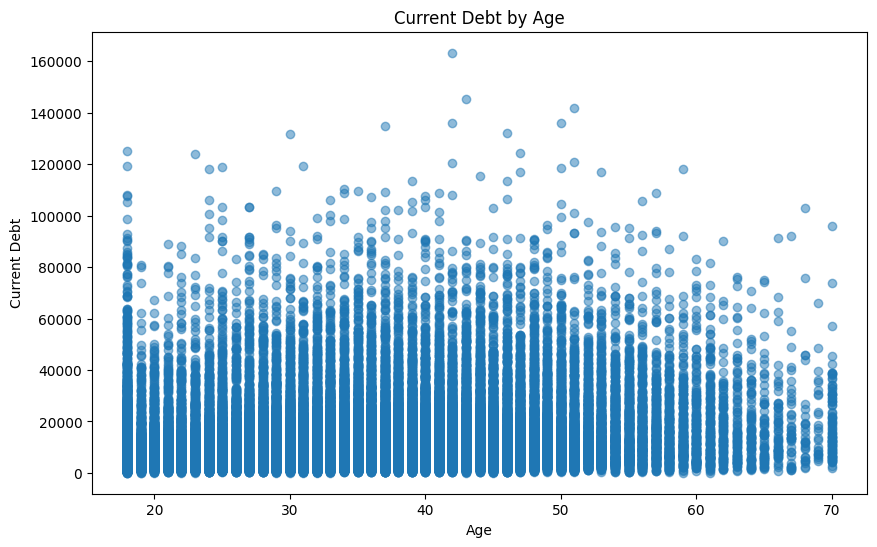

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(data['age'], data['current_debt'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Current Debt')
plt.title('Current Debt by Age')
plt.show()

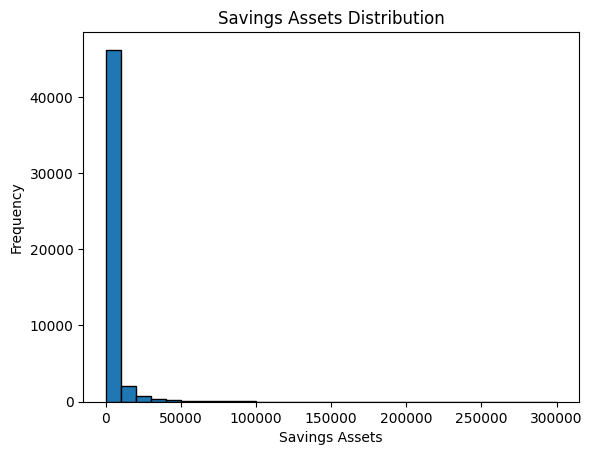

In [33]:
plt.hist(data['savings_assets'], bins=30, edgecolor='k')
plt.xlabel('Savings Assets')
plt.ylabel('Frequency')
plt.title('Savings Assets Distribution')
plt.show()

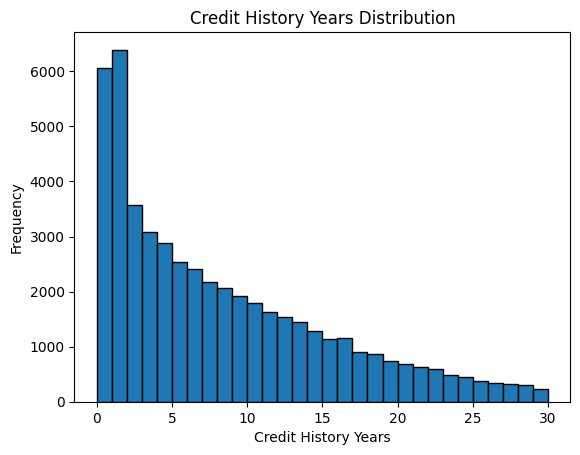

In [34]:
plt.hist(data['credit_history_years'], bins=30, edgecolor='k')
plt.xlabel('Credit History Years')
plt.ylabel('Frequency')
plt.title('Credit History Years Distribution')
plt.show()

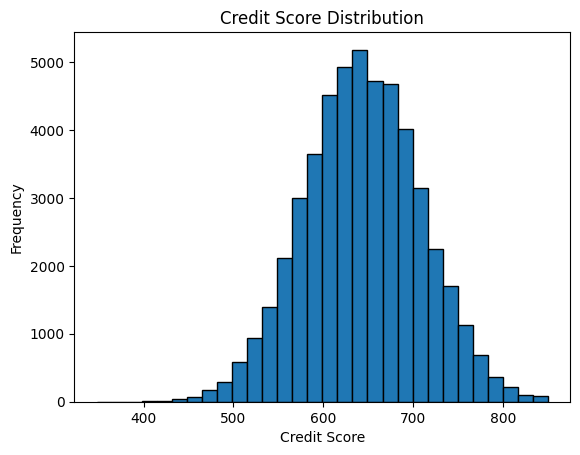

In [35]:
plt.hist(data['credit_score'], bins=30, edgecolor='k')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Score Distribution')
plt.show()

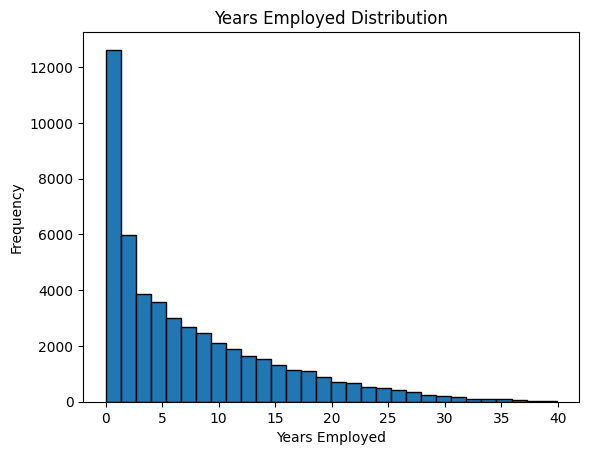

In [36]:
plt.hist(data['years_employed'], bins=30, edgecolor='k')
plt.xlabel('Years Employed')
plt.ylabel('Frequency')
plt.title('Years Employed Distribution')
plt.show()

Text(0.5, 1.0, 'Count of Loan Status by Occupation Status')

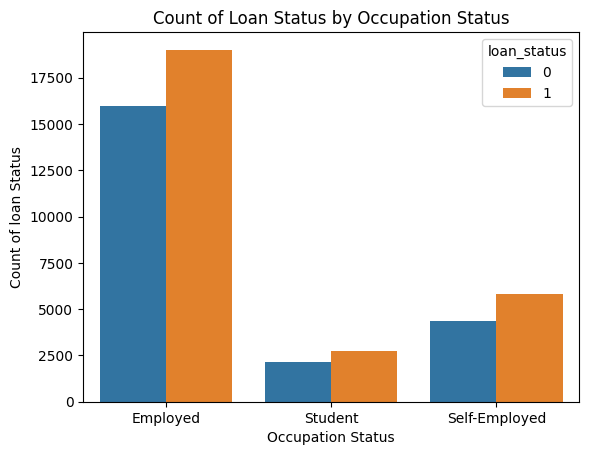

In [37]:

sns.countplot(x='occupation_status', hue='loan_status', data=data)
plt.xlabel('Occupation Status')
plt.ylabel('Count of loan Status')
plt.title('Count of Loan Status by Occupation Status')

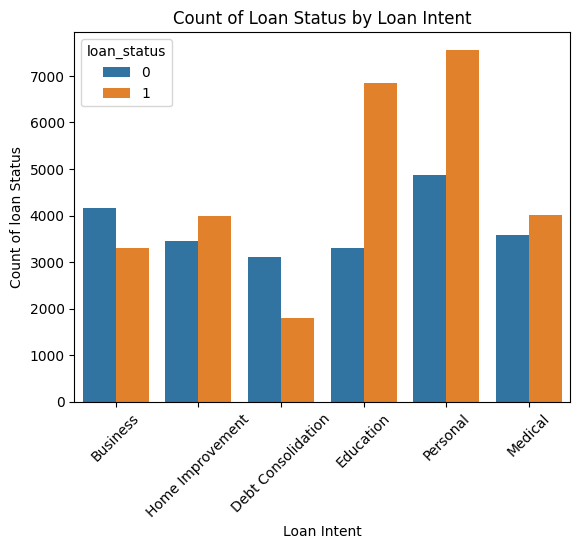

In [38]:
sns.countplot(x='loan_intent', hue='loan_status', data=data)
plt.xlabel('Loan Intent')
plt.ylabel('Count of loan Status')
plt.title('Count of Loan Status by Loan Intent')
plt.xticks(rotation=45)
plt.show()

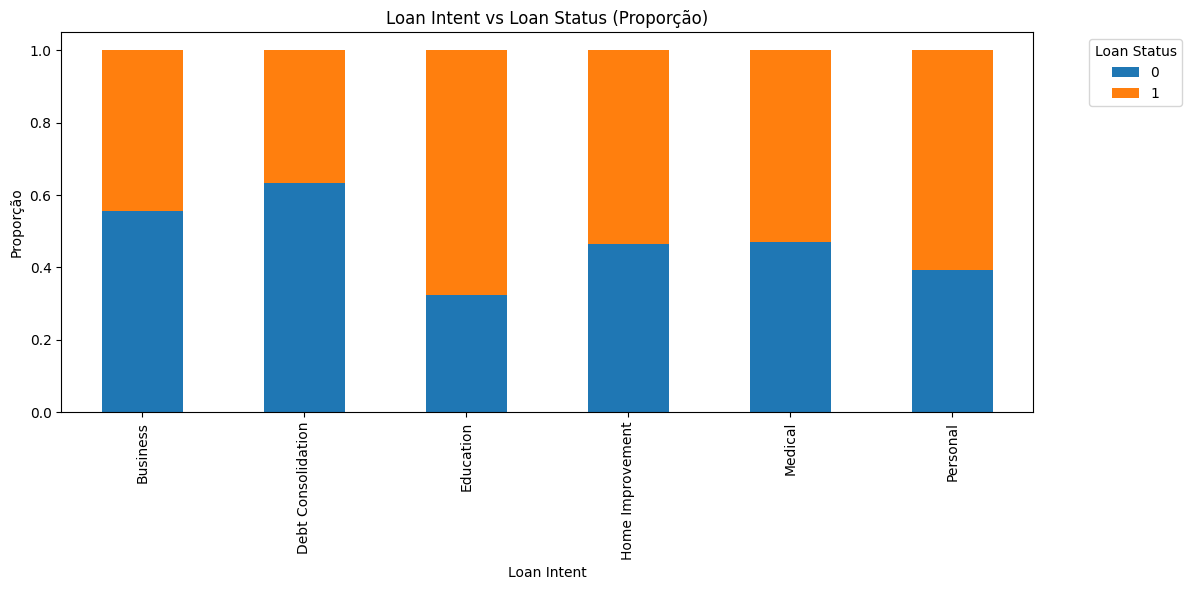

In [39]:
ct_intent = pd.crosstab(df['loan_intent'], df['loan_status'], normalize='index')

# plot
ct_intent.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title("Loan Intent vs Loan Status (Proporção)")
plt.xlabel("Loan Intent")
plt.ylabel("Proporção")
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

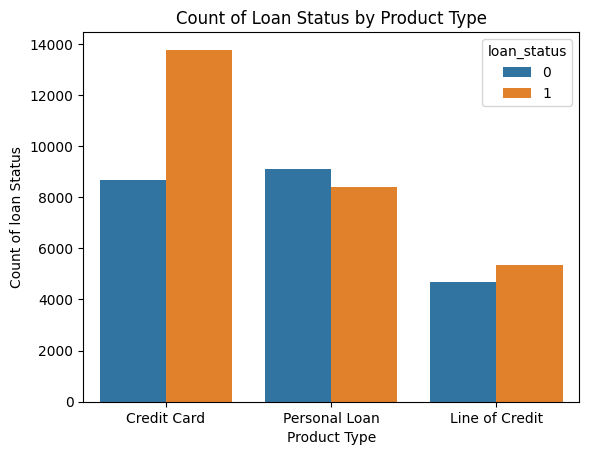

In [40]:
sns.countplot(x='product_type', hue='loan_status', data=data)
plt.xlabel('Product Type')
plt.ylabel('Count of loan Status')
plt.title('Count of Loan Status by Product Type')
plt.show()

In [41]:
gr = px.parallel_categories(data, dimensions=['product_type', 'loan_intent', 'occupation_status'])
gr.show()

In [42]:
gr = px.parallel_categories(data, dimensions=['product_type', 'occupation_status'])
gr.show()

In [43]:
gr = px.treemap(data, path=['product_type', 'loan_intent', 'occupation_status'], values='loan_amount', color='credit_score',
                 color_continuous_scale='RdBu',)
gr.show()

In [44]:
numeric_df = data.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
correlation

age  years_employed  annual_income  \
age                      1.000000        0.626840       0.264814   
years_employed           0.626840        1.000000       0.235926   
annual_income            0.264814        0.235926       1.000000   
credit_score             0.369271        0.235266       0.185058   
credit_history_years     0.636136        0.404618       0.164144   
savings_assets           0.177699        0.129377       0.203323   
current_debt             0.179684        0.161998       0.698170   
defaults_on_file        -0.063810       -0.041415      -0.038113   
delinquencies_last_2yrs -0.101463       -0.063597      -0.051635   
derogatory_marks        -0.098710       -0.065559      -0.044766   
loan_amount              0.172352        0.185206       0.511129   
interest_rate           -0.187963       -0.123444      -0.093371   
debt_to_income_ratio    -0.009043       -0.004341      -0.002630   
loan_to_income_ratio    -0.039339        0.018162      -0.138318   
payment_to_income_ratio -0.039345        0.018173      -0.138306   
loan_status              0.311524        0.218875       0.158466   

                         credit_score  credit_history_years  savings_assets  \
age                          0.369271              0.636136        0.177699   
years_employed               0.235266              0.404618        0.129377   
annual_income                0.185058              0.164144        0.203323   
credit_score                 1.000000              0.236862        0.080091   
credit_history_years         0.236862              1.000000        0.257595   
savings_assets               0.080091              0.257595        1.000000   
current_debt                 0.126314              0.113377        0.147054   
defaults_on_file            -0.188593             -0.045024       -0.015980   
delinquencies_last_2yrs     -0.284155             -0.063997       -0.022130   
derogatory_marks            -0.267832             -0.064447       -0.020653   
loan_amount                  0.112019              0.107280        0.106962   
interest_rate               -0.493183             -0.123866       -0.038229   
debt_to_income_ratio        -0.004806             -0.001180        0.001504   
loan_to_income_ratio        -0.019248             -0.024801       -0.029546   
payment_to_income_ratio     -0.019241             -0.024807       -0.029550   
loan_status                  0.496316              0.277103        0.094789   

                         current_debt  defaults_on_file  \
age                          0.179684         -0.063810   
years_employed               0.161998         -0.041415   
annual_income                0.698170         -0.038113   
credit_score                 0.126314         -0.188593   
credit_history_years         0.113377         -0.045024   
savings_assets               0.147054         -0.015980   
current_debt                 1.000000         -0.024707   
defaults_on_file            -0.024707          1.000000   
delinquencies_last_2yrs     -0.034781          0.252034   
derogatory_marks            -0.036273          0.098411   
loan_amount                  0.359800         -0.019340   
interest_rate               -0.061322          0.104561   
debt_to_income_ratio         0.599958         -0.001513   
loan_to_income_ratio        -0.096707          0.006069   
payment_to_income_ratio     -0.096691          0.006063   
loan_status                 -0.088494         -0.263033   

                         delinquencies_last_2yrs  derogatory_marks  \
age                                    -0.101463         -0.098710   
years_employed                         -0.063597         -0.065559   
annual_income                          -0.051635         -0.044766   
credit_score                           -0.284155         -0.267832   
credit_history_years                   -0.063997         -0.064447   
savings_assets                         -0.022130         -0.020653   
current_debt                       

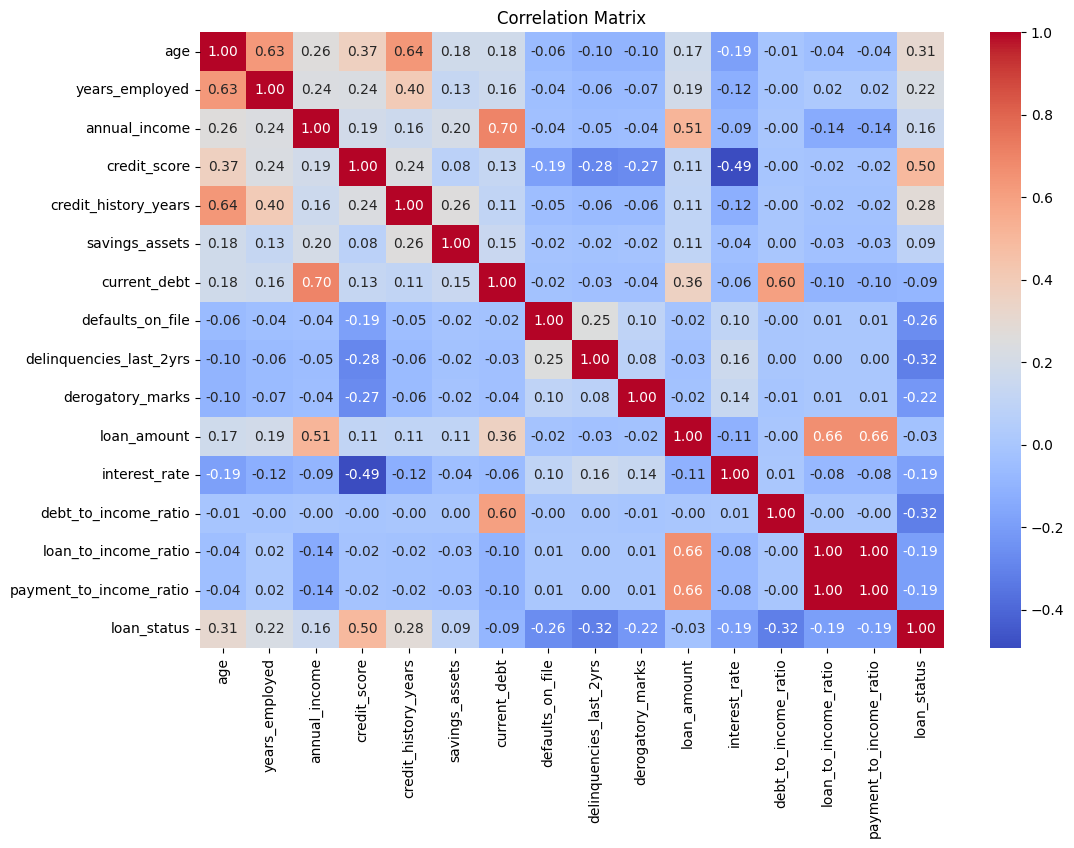

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:

target = 'loan_status'
df_corr = data.select_dtypes(include=[np.number]).corr()[target].sort_values(ascending=False)
df_corr

loan_status                1.000000
credit_score               0.496316
age                        0.311524
credit_history_years       0.277103
years_employed             0.218875
annual_income              0.158466
savings_assets             0.094789
loan_amount               -0.025987
current_debt              -0.088494
interest_rate             -0.185179
loan_to_income_ratio      -0.193252
payment_to_income_ratio   -0.193258
derogatory_marks          -0.224735
defaults_on_file          -0.263033
debt_to_income_ratio      -0.317363
delinquencies_last_2yrs   -0.318075
Name: loan_status, dtype: float64

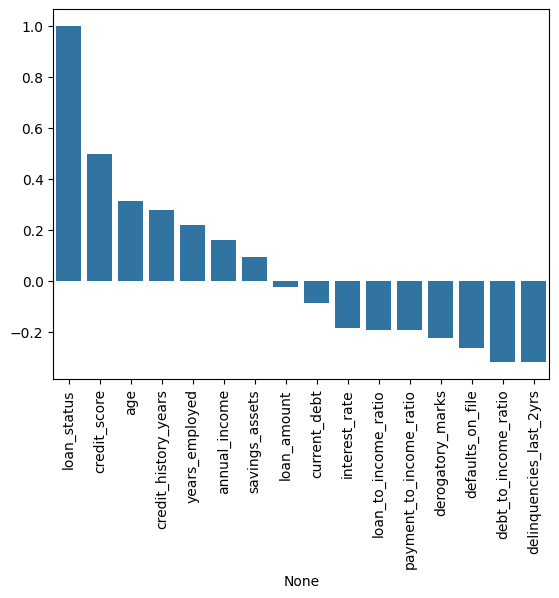

In [47]:
sns.barplot(x=df_corr.index, y=df_corr.values)
plt.xticks(rotation=90)
plt.show()

In [48]:
df_dropped.to_csv('../credit_loan/loan_eda_cleaned.csv', index=False)